## Trabajo Fin de Grado
### Gestor de Quirófanos
### Implementación de Heurísticas LPT+ y EDD+ para asignación de quirófanos

#### Autor: Jesús García Armario

In [1]:
# Imports
import numpy as np
import pandas as pd
from Utils import ActoQuirurgico, Quirofano, Heuristicas
import matplotlib.pyplot as plt
import math

In [2]:
# Importamos el listado preprocesado de una especialidad para las pruebas
filename = '..\\..\\Datos\\Listados_Preprocesados\\ListadoInterv_Preprocesado_MAXILOFACIAL.xlsx'
df = pd.read_excel(filename)

In [3]:
# Seleccionamos una muestra aleatoria de 100 pacientes
df = df.sample(n=100, random_state=1)
# Nos quedamos sólo con el NHC, Ponderación y duración
df = df[['NHC', 'PONDERACIÓN', 'DURACIÓN']]
df['DURACIÓN'] = df['DURACIÓN'] + 25
df['DURACIÓN'] = df['DURACIÓN'].apply(lambda x: math.ceil(x/30))

In [4]:
# Creamos un set de actos quirúrgicos
actos_pendientes = list()
i = 0
for elemento in df.itertuples():
    actos_pendientes.append(ActoQuirurgico(i, elemento[3], elemento[1], elemento[2]))
    i += 1


In [5]:
modelo = Heuristicas(actos_pendientes, 3,5,16)
asignacion_LPT, actos_pendientes_LPT = modelo.ejecutaHeuristica("LPT")

In [6]:
print("Numero de actos quirúrgicos sin asignar: ", len(actos_pendientes_LPT))
# Obtenemos el tiempo de trabajo de cada quirófano
tiempos = []
for i in range(len(asignacion_LPT)):
    for j in range(len(asignacion_LPT[i])):
        tiempos.append(asignacion_LPT[i][j].getTiempoOcupado())
print("Tiempo de trabajo de cada quirófano: ", tiempos)
print("Tiempo total de trabajo: ", sum(tiempos))
print("Tiempo medio de trabajo: ", sum(tiempos)/len(tiempos))
print("Tiempo libre de cada quirófano: ", [quir.getTiempoLibre() for quirofano in asignacion_LPT for quir in quirofano])
print("Tiempo libre total: ", sum([quir.getTiempoLibre() for quirofano in asignacion_LPT for quir in quirofano]))
print("Suma de prioridades: ", sum([acto.getPrioridad() for quirofano in asignacion_LPT for quir in quirofano for acto in quir.getActos()]))

Numero de actos quirúrgicos sin asignar:  51
Tiempo de trabajo de cada quirófano:  [11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10]
Tiempo total de trabajo:  154
Tiempo medio de trabajo:  10.266666666666667
Tiempo libre de cada quirófano:  [5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 6, 6, 6]
Tiempo libre total:  86
Suma de prioridades:  847


In [8]:
asignacion_LPTEDD, actos_pendientes_LPTEDD = modelo.ejecutaHeuristica("LPTEDD")
print("Numero de actos quirúrgicos sin asignar: ", len(actos_pendientes_LPTEDD))
# Obtenemos el tiempo de trabajo de cada quirófano
tiempos = []
for i in range(len(asignacion_LPTEDD)):
    for j in range(len(asignacion_LPTEDD[i])):
        tiempos.append(asignacion_LPTEDD[i][j].getTiempoOcupado())
print("Tiempo de trabajo de cada quirófano: ", tiempos)
print("Tiempo total de trabajo: ", sum(tiempos))
print("Tiempo medio de trabajo: ", sum(tiempos)/len(tiempos))
print("Tiempo libre de cada quirófano: ", [quir.getTiempoLibre() for quirofano in asignacion_LPTEDD for quir in quirofano])
print("Tiempo libre total: ", sum([quir.getTiempoLibre() for quirofano in asignacion_LPTEDD for quir in quirofano]))
print("Suma de prioridades: ", sum([acto.getPrioridad() for quirofano in asignacion_LPTEDD for quir in quirofano for acto in quir.getActos()]))

Numero de actos quirúrgicos sin asignar:  51
Tiempo de trabajo de cada quirófano:  [9, 9, 15, 9, 10, 13, 8, 9, 13, 7, 10, 8, 7, 11, 7]
Tiempo total de trabajo:  145
Tiempo medio de trabajo:  9.666666666666666
Tiempo libre de cada quirófano:  [7, 7, 1, 7, 6, 3, 8, 7, 3, 9, 6, 8, 9, 5, 9]
Tiempo libre total:  95
Suma de prioridades:  760


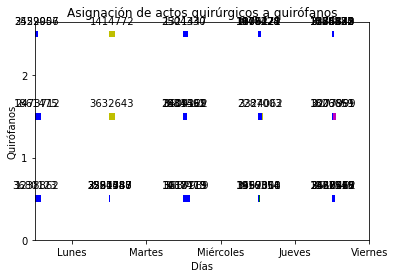

In [9]:
# Representamos gráficamente la asignación de actos quirúrgicos a quirófanos
# Función que representa gráficamente la asignación de actos quirúrgicos a quirófanos
def representacionAsignacion(asignacion):
    # Creamos una lista de colores
    colores = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    # Creamos una lista de días
    dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes']
    # Creamos una lista de quirófanos a partir de la primera dimensión de la asignación
    quirofanos = [i for i in range(len(asignacion))]
    # Creamos un diccionario de días a partir de la segunda dimensión de la asignación
    dias_dict = {i: dias[i] for i in range(len(asignacion[0]))}
    # Accedemos a cada quirófano
    for i in range(len(asignacion)):
        # Accedemos a cada día
        for j in range(len(asignacion[i])):
            # Accedemos a cada acto quirúrgico
            for acto in asignacion[i][j].getActos():
                # Representamos el acto quirúrgico
                plt.barh((i+1)*10, acto.getDuracion(), left=j*100, color=colores[acto.getPrioridad()%7])
                # Añadimos el nombre del acto quirúrgico dentro de la barra
                plt.text(j*100+acto.getDuracion()/2, (i+1)*10+1, acto.getIdPaciente(), ha='center', va='bottom')
    # Añadimos el título
    plt.title('Asignación de actos quirúrgicos a quirófanos')
    # Añadimos el nombre de los ejes
    plt.xlabel('Días')
    plt.ylabel('Quirófanos')
    # Añadimos los ticks de los ejes
    plt.xticks([i*100+50 for i in range(len(dias))], dias)
    plt.yticks([i*10+5 for i in range(len(quirofanos))], quirofanos)
    # Mostramos la gráfica
    plt.show()

representacionAsignacion(asignacion_LPTEDD)
